<img src="https://camo.githubusercontent.com/9f7c69771104a2df48a040b897a44ad5387f07f77e1e7e5159e68e874fdf8c7f/68747470733a2f2f7777772e6869742e61632e696c2f2e75706c6f61642f61636164656d69632d656e7472657072656e657572736869702f697269732f706172746e6572732f7368656e6b61724c6f676f2e6a7067">

# Final project 
## Lecturer: Eyal Nussbaum
## Student: Lucas Kujawski

## 1. Intro
In the following notebook, we will analyse a dataset describing League of Legends matches.

The dataset contains around 65K rows, containing on each:

* ##### gameId: number
Unique Riot game ID.

* ##### gameDuraton: number
Game Duration(seconds)

* ##### <span style="color:blue">blueWardPlaced</span>/<span style="color:red">redWardPlaced</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team ward placed counts(Number of warding totems)

* ##### <span style="color:blue">blueWardkills</span>/<span style="color:red">redWardkills</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team ward killed counts(Number of warding killed)

* ##### <span style="color:blue">blueTotalMinionKills</span>/<span style="color:red">redTotalMinionKills</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team kill minion counts (includign jungle)

* ##### <span style="color:blue">blueJungleMinionKills</span>/<span style="color:red">redJungleMinionKills</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team kill jungle minion counts

* ##### <span style="color:blue">blueTotalHeal</span>/<span style="color:red">redTotalHeal</span>: number
<span style="color:blue">blue</span>/<span style="color:red">red</span> team heal amounts

* ##### FirstBlood: categorical - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Which team got the first kill of an enemy champion

* ##### FirstTower: categorical - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Which team first destroyed an enemy turret

* ##### FirstBaron: categorical - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Which team first killed Baron Nashor

* ##### FirstDragon: categorical - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Which team first killed a Dragon

* ##### win: Target Class - <span style="color:blue">Blue</span>/<span style="color:red">Red</span>
Who won the game


In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install scipy
!pip install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import datetime
from pandas.api.types import is_numeric_dtype
import sklearn as skl
from scipy.stats import skewnorm
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus
from matplotlib import ticker


You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('lol3.csv')

## 2. Initial data analysis

In [3]:
df.head()

,gameId,gameDuraton,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal,win,FirstBlood,FirstTower,FirstBaron,FirstDragon
0,4241678498,2098,129,39.0,774,226,24718,96,NaN,832.0,205.0,65312.0,Red,Red,Red,Blue,Blue
1,4233222221,1686,72,26.0,601,136,20503,72,29.0,NaN,214.0,31415.0,Red,NaN,Blue,Red,Red
2,4233113995,1588,79,39.0,613,157,28612,76,28.0,NaN,NaN,27846.0,Blue,Blue,Blue,Blue,Red
3,4229230455,1126,43,20.0,486,115,17630,47,19.0,461.0,92.0,NaN,Blue,Red,Blue,Red,Blue
4,4228244819,1262,49,16.0,509,129,13040,43,17.0,506.0,113.0,17891.0,Blue,Red,Red,Red,Blue


In [4]:
df.describe()

,gameId,gameDuraton,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal
count,6.589600e+04,65896.000000,65896.000000,59289.000000,65896.000000,65896.000000,65896.000000,65896.000000,50180.000000,59340.000000,54098.000000,63355.000000
mean,4.172854e+09,1427.961591,53.617564,19.819511,498.855333,122.692303,24462.290974,53.786421,19.566780,503.945383,124.647713,24838.933454
std,7.889291e+07,429.784566,31.231714,15.018380,179.961166,67.143071,15150.270579,31.459582,14.823881,183.780133,69.093028,15314.030768
min,3.191955e+09,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.144505e+09,1121.000000,33.000000,8.000000,379.000000,81.000000,13446.750000,33.000000,8.000000,381.000000,82.000000,13686.000000
50%,4.194611e+09,1414.000000,54.000000,18.000000,515.000000,126.000000,21448.000000,54.000000,18.000000,521.000000,128.000000,21873.000000
75%,4.224057e+09,1724.000000,74.000000,29.000000,623.000000,169.000000,32149.000000,74.000000,29.000000,632.000000,171.000000,32680.000000
max,4.257022e+09,3301.000000,230.000000,118.000000,1315.000000,400.000000,261707.000000,226.000000,117.000000,1287.000000,1003.000000,206758.000000


In [5]:
#definitions
int_columns = ['blueWardPlaced', 'blueWardkills', 'blueTotalMinionKills', 'blueJungleMinionKills',
               'blueTotalHeal', 'redWardPlaced', 'redWardkills', 'redTotalMinionKills',
               'redJungleMinionKills', 'redTotalHeal']
stats_columns = ['win', 'FirstBlood', 'FirstTower', 'FirstBaron', 'FirstDragon']
team_columns = ['blueWardPlaced', 'blueWardkills', 'blueTotalMinionKills', 'blueJungleMinionKills',
               'blueTotalHeal', 'redWardPlaced', 'redWardkills', 'redTotalMinionKills',
               'redJungleMinionKills', 'redTotalHeal']
teams = ['blue', 'red']

### 2.1 Feature statistical analysis

In [6]:
df.describe()

,gameId,gameDuraton,blueWardPlaced,blueWardkills,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,redWardPlaced,redWardkills,redTotalMinionKills,redJungleMinionKills,redTotalHeal
count,6.589600e+04,65896.000000,65896.000000,59289.000000,65896.000000,65896.000000,65896.000000,65896.000000,50180.000000,59340.000000,54098.000000,63355.000000
mean,4.172854e+09,1427.961591,53.617564,19.819511,498.855333,122.692303,24462.290974,53.786421,19.566780,503.945383,124.647713,24838.933454
std,7.889291e+07,429.784566,31.231714,15.018380,179.961166,67.143071,15150.270579,31.459582,14.823881,183.780133,69.093028,15314.030768
min,3.191955e+09,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.144505e+09,1121.000000,33.000000,8.000000,379.000000,81.000000,13446.750000,33.000000,8.000000,381.000000,82.000000,13686.000000
50%,4.194611e+09,1414.000000,54.000000,18.000000,515.000000,126.000000,21448.000000,54.000000,18.000000,521.000000,128.000000,21873.000000
75%,4.224057e+09,1724.000000,74.000000,29.000000,623.000000,169.000000,32149.000000,74.000000,29.000000,632.000000,171.000000,32680.000000
max,4.257022e+09,3301.000000,230.000000,118.000000,1315.000000,400.000000,261707.000000,226.000000,117.000000,1287.000000,1003.000000,206758.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65896 entries, 0 to 65895
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gameId                 65896 non-null  int64  
 1   gameDuraton            65896 non-null  int64  
 2   blueWardPlaced         65896 non-null  int64  
 3   blueWardkills          59289 non-null  float64
 4   blueTotalMinionKills   65896 non-null  int64  
 5   blueJungleMinionKills  65896 non-null  int64  
 6   blueTotalHeal          65896 non-null  int64  
 7   redWardPlaced          65896 non-null  int64  
 8   redWardkills           50180 non-null  float64
 9   redTotalMinionKills    59340 non-null  float64
 10  redJungleMinionKills   54098 non-null  float64
 11  redTotalHeal           63355 non-null  float64
 12  win                    65896 non-null  object 
 13  FirstBlood             50036 non-null  object 
 14  FirstTower             63208 non-null  object 
 15  Fi

**We see that there are many null values in the following columns:**

    1. blueWardkills
    2. redWardkills
    3. redTotalMinionKills
    4. redJungleMinionKills
    5. FirstBlood
    6. FirstBaron

### 2.2 Data fixes: 

* We might have repeated values in gameId, let's remove them. Then lets set gameId as index

In [8]:
df.drop_duplicates(subset='gameId', keep="first", inplace=True)
df.set_index('gameId')
df.drop(['gameId'], inplace=True, axis=1)

* In order to replace integer NA or 0 values, we will analyse their relation with other columns:

In [9]:
df[int_columns] = df[int_columns].replace([0], np.nan)

In [10]:
def replace_na(_df, x, y):
    int_df = _df[int_columns]
    non_NA_int_df = int_df[int_df > 0].dropna(inplace=False)
    relation = (non_NA_int_df[x]/non_NA_int_df[y]).mean()
    def relation_replace(row):
        if pd.isna(row[x]) and not pd.isna(row[y]):
            row[x] = row[y] * relation
        return row
    return _df.apply(relation_replace, axis=1)
df = replace_na(df,'blueWardkills', 'redWardPlaced')
df = replace_na(df,'redWardkills', 'blueWardPlaced')
df = replace_na(df,'redTotalMinionKills', 'redJungleMinionKills')
df = replace_na(df,'redJungleMinionKills', 'redTotalMinionKills')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65876 entries, 0 to 65895
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gameDuraton            65876 non-null  int64  
 1   blueWardPlaced         59583 non-null  float64
 2   blueWardkills          59394 non-null  float64
 3   blueTotalMinionKills   65873 non-null  float64
 4   blueJungleMinionKills  59401 non-null  float64
 5   blueTotalHeal          65872 non-null  float64
 6   redWardPlaced          59394 non-null  float64
 7   redWardkills           59583 non-null  float64
 8   redTotalMinionKills    64125 non-null  float64
 9   redJungleMinionKills   64125 non-null  float64
 10  redTotalHeal           63324 non-null  float64
 11  win                    65876 non-null  object 
 12  FirstBlood             50021 non-null  object 
 13  FirstTower             63189 non-null  object 
 14  FirstBaron             59217 non-null  object 
 15  Fi

* 0 are also values that we would like to fix, let's try to see how many do we have

* We remove unconsistent rows:
1. number of ward killed of a team > number of ward placed of the adversary
2. minion jungle kills of a team > total jungle kills of a team

In [12]:
print("Removing {} rows".format(len(df[df['blueWardkills'] > df['redWardPlaced']])))
print("Removing {} rows".format(len(df[df['redWardkills'] > df['blueWardPlaced']])))
print("Removing {} rows".format(len(df[df['redJungleMinionKills'] > df['redTotalMinionKills']])))
print("Removing {} rows".format(len(df[df['blueJungleMinionKills'] > df['blueTotalMinionKills']])))

df = df[df['blueWardkills'] <= df['redWardPlaced']]
df = df[df['redWardkills'] <= df['blueWardPlaced']]
df = df[df['redJungleMinionKills'] <= df['redTotalMinionKills']]
df = df[df['blueJungleMinionKills'] <= df['blueTotalMinionKills']]

Removing 0 rows
Removing 0 rows
Removing 53 rows
Removing 16 rows


* NA Values on win or FirstX invalidates the row as we can't analyse what happen on that game. We remove those lines
* We have only a few NA values on integer column. So we remove them

In [13]:
print("Removing {} rows".format(df.shape[0] - df.dropna().shape[0]))
df.dropna(inplace=True)

Removing 21486 rows


* We remove games shorter than a minute

In [14]:
df = df[df['gameDuraton'] > 60]

* Numeric columns are integer.

In [15]:
df[stats_columns] = df[stats_columns].astype(str).apply(lambda x: x.str.lower())

### Data manipulation
**We will add and change some features so can understand better or analyze some features**

* We will convert seconds to minutes:

In [16]:
df['minutesDuration'] = (df['gameDuraton'] / 60).astype('int32')
df.drop(['gameDuraton'], axis=1, inplace=True)

* We want to analyze some winning behaviours without team knowledge. So we will create:
1. winnerKillsPerMinute
2. winnerTotalKills
3. winnerWardkillsPercentage

In [17]:
def winStats(row):
    if row['win'] == 'red':
        row['winnerKillsPerMinute'] = (row['redWardkills']/row['minutesDuration'])
        row['winnerTotalKills'] = row['redWardkills']
        row['winnerWardkillsPercentage'] = (row['redWardkills']/row['blueWardPlaced']) * 100
    else:
        row['winnerKillsPerMinute'] = row['blueWardkills']/row['minutesDuration']
        row['winnerTotalKills'] = row['blueWardkills']
        row['winnerWardkillsPercentage'] = (row['blueWardkills']/row['redWardPlaced']) * 100
    return row        
df = df.apply(winStats, axis=1)
int_columns = int_columns + ['winnerTotalKills', 'winnerWardkillsPercentage']

* Counts the times that winner was the first team to achieve the milestones

In [18]:
first_df = df.copy()
for column in stats_columns[1:]:
    first_df['is{column}Winner'.format(column=column)] = (first_df['win'] ==  first_df['{column}'.format(column=column)])
    
first_columns = ['isFirstBloodWinner', 'isFirstTowerWinner', 'isFirstBaronWinner','isFirstDragonWinner']
first_df = first_df[first_columns].astype('int32')
df['winnerFirstTotal'] = first_df.sum(axis=1)
int_columns = int_columns + ['winnerFirstTotal']

* We have tree types of numeric columns: rates, percentage and counts. We've moved percentage to values from 0 to 100 so what's after the comma is not very relevant. In terms of counts, decimals can be treatead as noise. Therefore, we will convert percentages and counts as integer. 

In [19]:
df[int_columns] = df[int_columns].astype('int32')

#### Summary: 

* We replace numeric integer NA values for 0, as we assume that this could be a reasonable value.
* NA Values on win or FirstX invalidates the row as we can't analyse what happen on that game. We remove those lines
* We remove unconsistent rows:
1. number of ward killed of a team > number of ward placed of the adversary
2. minion jungle kills of a team > total jungle kills of a team
* We remove games shorter than a minute
* NA Values on win or FirstX invalidates the row as we can't analyse what happen on that game. We remove those lines
* Numeric columns are integer.
* As it does not matter if the team is blue or red, we will switch it to winner/looser

**Resulting data set**

In [50]:
df.head()
df.to_csv('resulting_dataset.csv')

## 3. Exploratory Data Analysis

### 3.1 Feature correlation
Let's see correlation between columns

Text(0.5, 1.0, 'Correlation')

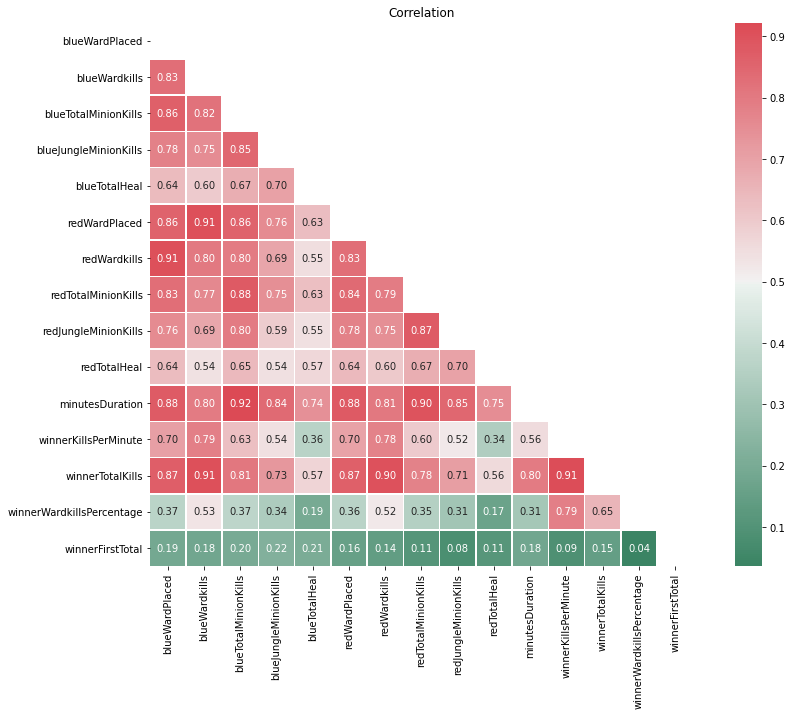

In [21]:
corr = df.corr().abs()
mask = np.triu(corr)
cmap = sns.diverging_palette(150, 10, as_cmap=True)
plt.figure(figsize = (15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0.5, annot = True, fmt = '.2f', square=True, linewidths=.5).set_title("Correlation")

Text(0.5, 1.0, 'Correlation')

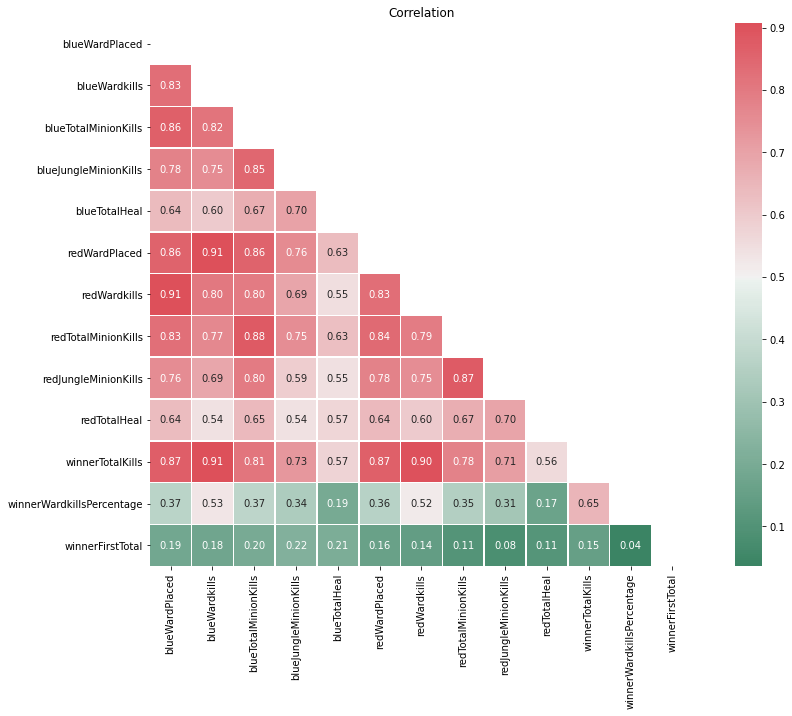

In [22]:
df_int = df[int_columns]
corr = df_int.corr().abs()
mask = np.triu(corr)
cmap = sns.diverging_palette(150, 10, as_cmap=True)
plt.figure(figsize = (15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0.5, annot = True, fmt = '.2f', square=True, linewidths=.5).set_title("Correlation")

Text(0.5, 1.0, 'Correlation')

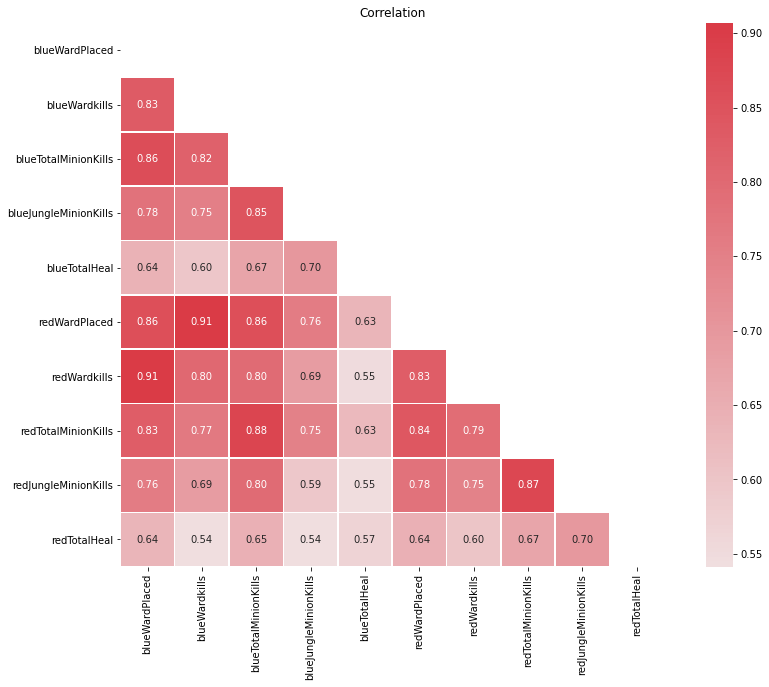

In [23]:
df_int = df[team_columns]
corr = df_int.corr().abs()
mask = np.triu(corr)
cmap = sns.diverging_palette(150, 10, as_cmap=True)
plt.figure(figsize = (15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0.5, annot = True, fmt = '.2f', square=True, linewidths=.5).set_title("Correlation")

Placeholder:correlation conclusions

## 3.2 Analysis of each feature

Text(0.5, 1.0, 'Red ward placed')

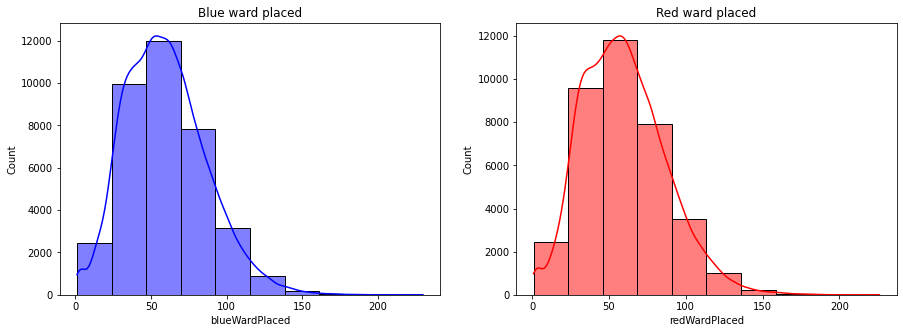

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df.blueWardPlaced, bins=10, kde=True, color="blue").set_title('Blue ward placed')
plt.subplot(1,2,2)
sns.histplot(df.redWardPlaced, bins=10, kde=True, color="red").set_title('Red ward placed')


Text(0.5, 1.0, 'Red ward killed')

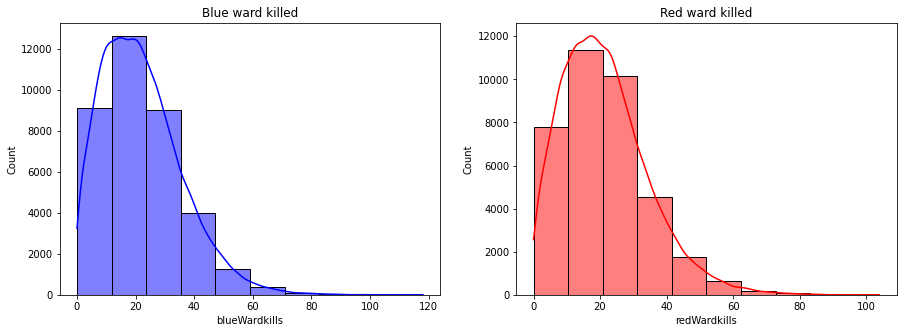

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df.blueWardkills, bins=10, kde=True, color="blue").set_title('Blue ward killed')
plt.subplot(1,2,2)
sns.histplot(df.redWardkills, bins=10, kde=True, color="red").set_title('Red ward killed')


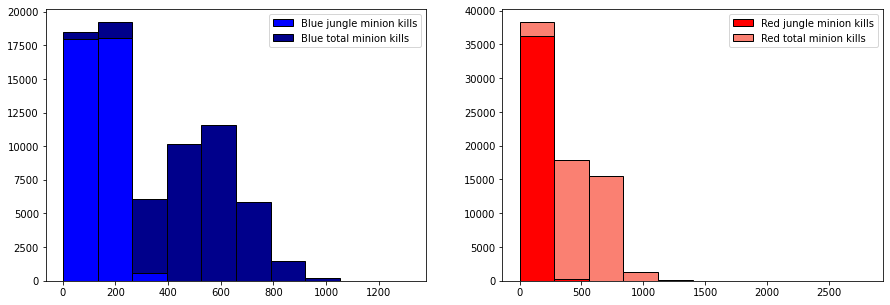

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist([df.blueJungleMinionKills,df.blueTotalMinionKills], stacked=True, ec="k",color=["blue", "darkblue"])
labels= ["Blue jungle minion kills","Blue total minion kills"]
plt.legend(labels)
plt.subplot(1,2,2)
plt.hist([df.redJungleMinionKills,df.redTotalMinionKills], stacked=True, ec="k",color=["red", "salmon"])
labels= ["Red jungle minion kills","Red total minion kills"]
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'Red total heal')

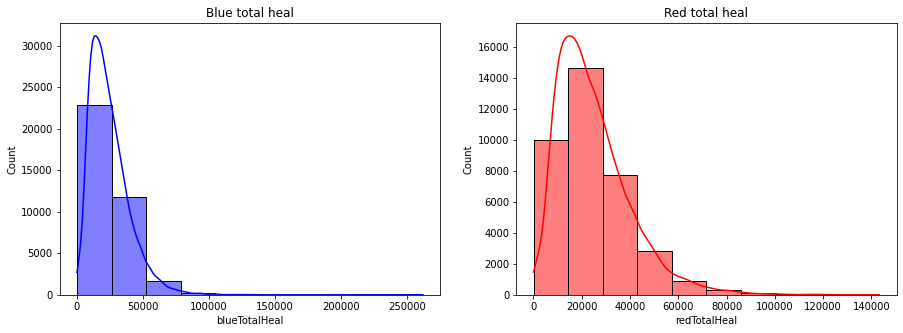

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df.blueTotalHeal, bins=10, kde=True, color="blue").set_title('Blue total heal')
plt.subplot(1,2,2)
sns.histplot(df.redTotalHeal, bins=10, kde=True, color="red").set_title('Red total heal')


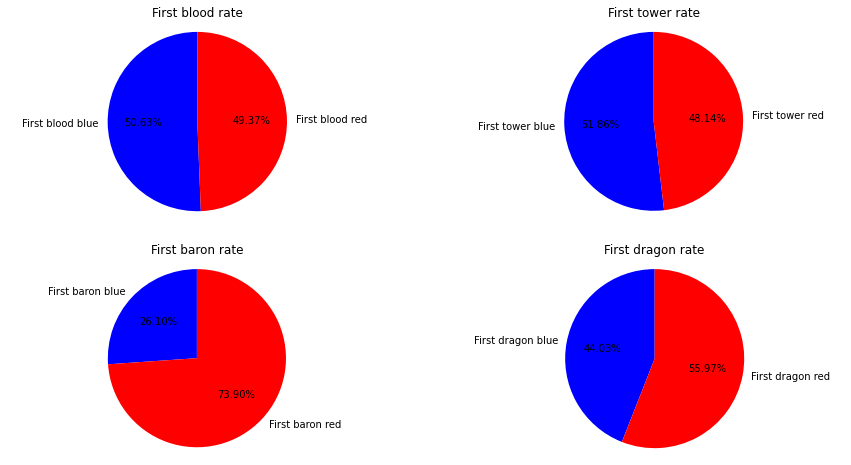

In [28]:
plt.figure(figsize=(15,8))

def pie_plot(column, pos, labels, title):
    plt.subplot(2,2,pos)
    total = len(df)
    left = np.sum(df[column] == 'blue')
    right = np.sum(df[column] == 'red')
    left_percent = left/total * 100
    right_percent = right/total * 100
    plt.pie((left_percent,right_percent),
            colors=['blue', 'red'],
            labels = labels,
            startangle = 90,
            wedgeprops = {'linewidth': 3},
            autopct='%.2f%%')
    plt.axis('equal')
    plt.title(title)
pie_plot('FirstBlood', 1, ('First blood blue', 'First blood red'), 'First blood rate')
pie_plot('FirstTower', 2, ('First tower blue', 'First tower red'), 'First tower rate')
pie_plot('FirstBaron', 3, ('First baron blue', 'First baron red'), 'First baron rate')
pie_plot('FirstDragon', 4, ('First dragon blue', 'First dragon red'), 'First dragon rate')


## 3.3 Visualization for relevant and interesting features
We would like to answer the following questions.

**Teams**
* Do blue win more than red?

**Milestones**
* Do first killing a champion increase chance of winning?
* Do first destroying an enemy turret increase chance of winning?
* Do first killing a Baron Nashor increase chance of winning?
* Do first killing a Dragon increase chance of winning?

**Killing abilities**
* Do kill faster increases with time?
* What’s the percentage of kills a team needs to do to win

**Healing**
* Do heal amount increase chance of winning?

### Teams

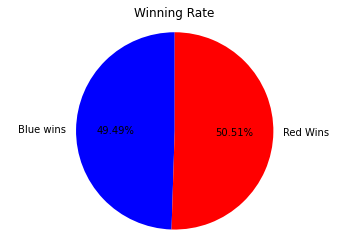

In [29]:
total = len(df)
blue_wins = np.sum(df['win'] == 'blue')
red_wins = np.sum(df['win'] == 'red')

blue_wins_percent = blue_wins/total * 100
red_wins_percent = red_wins/total * 100

plt.pie((blue_wins_percent,red_wins_percent),
        colors=['blue', 'red'],
        labels = ('Blue wins', 'Red Wins'),
        startangle = 90,
        autopct='%.2f%%')
plt.axis('equal')
plt.title('Winning Rate')
plt.show()

* Do blue win more than red? Not really

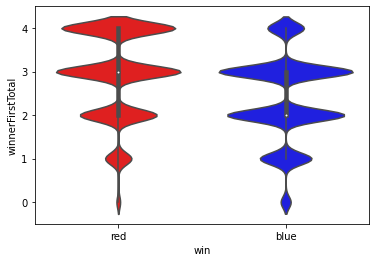

In [30]:
plot = sns.violinplot(x='win', y='winnerFirstTotal',
                        order=['red', 'blue'],
                      palette=['r','b'],
                       data=df)

#### Above graph analysis
* When a red team won, they often were the first to do three or more of the following achievements: team got the first kill of an enemy champion, team first destroyed an enemy turret, team first killed Baron Nashor, team first killed a Dragon. Instead, when a blue won, they often did two or three of them.

**Let's see how every milestone impact each of the teams**

### Milestones

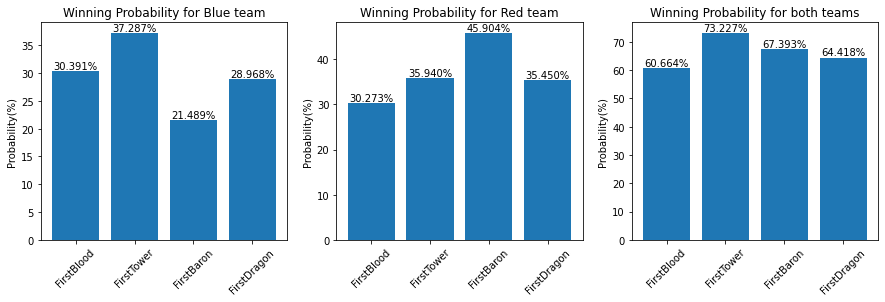

In [49]:
total = len(df.dropna(inplace=False))
milestones_blue = []
milestones_red = []
milestones_both = []
labels = []
for col in stats_columns[1:]:
    labels.append(col)
    milestones_blue.append(np.sum((df['win'] == 'blue') & (df[col] == 'blue'))/total * 100)
    milestones_red.append((np.sum((df['win'] == 'red') & (df[col] == 'red'))/total * 100))
    milestones_both.append((np.sum((df['win'] == df[col]))/total * 100))

y_pos = np.arange(len(stats_columns[1:]))
    
fig, ax = plt.subplots(1, 3, figsize=(15,4))
ax[0].bar(y_pos, milestones_blue, align='center', alpha=1)

ax[0].xaxis.set_major_locator(ticker.FixedLocator(y_pos))
ax[0].xaxis.set_major_formatter(ticker.FixedFormatter(labels))
ax[0].set_ylabel('Probability(%)')
ax[0].set_title('Winning Probability for Blue team')
for a,b in zip(y_pos, milestones_blue):
    ax[0].text(a, b, '%.3f'%b+'%', ha='center', va= 'bottom')
plt.setp(ax[0].get_xticklabels(), rotation=45)


ax[1].bar(y_pos, milestones_red, align='center', alpha=1)

ax[1].xaxis.set_major_locator(ticker.FixedLocator(y_pos))
ax[1].xaxis.set_major_formatter(ticker.FixedFormatter(labels))
ax[1].set_ylabel('Probability(%)')
ax[1].set_title('Winning Probability for Red team')
for a,b in zip(y_pos, milestones_red):
    ax[1].text(a, b, '%.3f'%b+'%', ha='center', va= 'bottom')
plt.setp(ax[1].get_xticklabels(), rotation=45)
    
ax[2].bar(y_pos, milestones_both, align='center', alpha=1)

ax[2].xaxis.set_major_locator(ticker.FixedLocator(y_pos))
ax[2].xaxis.set_major_formatter(ticker.FixedFormatter(labels))
ax[2].set_ylabel('Probability(%)')
ax[2].set_title('Winning Probability for both teams')
for a,b in zip(y_pos, milestones_both):
    ax[2].text(a, b, '%.3f'%b+'%', ha='center', va= 'bottom')
plt.setp(ax[2].get_xticklabels(), rotation=45)
pass

* Conclusion: Red team seems to be more impacted on milestones. 

### Killing abilities

In [ ]:
cmap = sns.diverging_palette(200, 10, as_cmap=True)
plt.scatter(x=df['minutesDuration'], y=df['winnerKillsPerMinute'], s=df['winnerTotalKills'],
                    c=df['winnerFirstTotal'],
                    cmap=cmap, alpha=0.6)
plt.title("minutesDuration vs winnerKillsPerMinute")
plt.xlabel("minutesDuration")
plt.ylabel("winnerKillsPerMinute")
plt.colorbar(label='winnerFirstTotal')

#### Above graph analysis
* We can see in the graph above, that matches were the winner were the first to hit the opponent in any way (kill of an enemy champion, destroyed an enemy turret, killed Baron Nashor or killed a Dragon) were faster.
* Those where the winner didn't hit the opponent in any way were in general longer than 30 minutes.
* Total kills increases with time
* Do kill faster increases with time? Yes, we see that as long as duration increases, the kill rate increases as well

In [ ]:
sns.histplot(df.winnerWardkillsPercentage, bins=10, kde=True).set_title('Winner kills percentage')

* What’s the percentage of kills a team needs to do to win? 40% of kills seems to be a good number of kills to win

### Heal

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].scatter(x=df['minutesDuration'], y=df['redTotalHeal'], s=df['winnerTotalKills'],
                    c=df['win'], alpha=0.6)
ax[0].set_title("redTotalHeal vs minutesDuration")
ax[0].set_xlabel("minutesDuration")
ax[0].set_ylabel("redTotalHeal")

ax[1].scatter(x=df['minutesDuration'], y=df['blueTotalHeal'], s=df['winnerTotalKills'],
                    c=df['win'], alpha=0.6)
ax[1].set_title("blueTotalHeal vs minutesDuration")
ax[1].set_xlabel("minutesDuration")
ax[1].set_ylabel("blueTotalHeal")


**Conclusion**: Do heal amount increase chance of winning? Sure it does.

## 4. Classification Model

In [ ]:
sns.pairplot(df[['redTotalHeal', 'blueJungleMinionKills', 'blueTotalHeal', 'redJungleMinionKills', 'win']], hue='win', height=1.5)

In [ ]:
sns.pairplot(df[['redTotalHeal', 'blueJungleMinionKills', 'redWardkills', 'redWardPlaced', 'win']], hue='win', height=1.5)

The following features show a good split:
1. blueJungleMinionKills vs redTotalHeal
2. redJungleMinionKills vs blueJungleMinionKills
3. blueTotalHeal vs redTotalHeal

### 4.1 Gaussian Naïve Bayes

In [ ]:
def check_accuracy(items):
    X = df[items]
    Y = df['win']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,
                                                    random_state=1)

    model = GaussianNB()                       # 2. instantiate model
    model.fit(Xtrain, ytrain)                  # 3. fit model to data
    y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

    ypred = pd.Series(y_model,name="prediction")
    predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
    accuracy = metrics.accuracy_score(ytest, y_model)
    print("{} vs {} accuracy: ".format(items[0], items[1]), accuracy)

check_accuracy(['blueJungleMinionKills', 'redTotalHeal'])
check_accuracy(['redJungleMinionKills', 'blueJungleMinionKills'])
check_accuracy(['blueTotalHeal', 'redTotalHeal'])

We choose redJungleMinionKills vs blueJungleMinionKill because it has the highest accuracy

In [ ]:
X = df[['redJungleMinionKills', 'blueJungleMinionKills']]
Y = df['win']
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]

    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)
    
    # Train Classifer
    

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)

    hueorder = clf.classes_
    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()
    return y_pred, y_test


y_pred, y_test = bayes_plot(pd.concat([X,Y],axis=1),spread=1)

### Classification report

In [ ]:
print(metrics.classification_report(y_test, y_pred))

### 4.2 Decision Tree

**a. Baseline decision tree**

In [ ]:
from sklearn.inspection import permutation_importance

def display_trained_tree_with_performance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)

    result = permutation_importance(clf, X, y, n_repeats=10,random_state=0)
    importance = zip(X.columns,result['importances_mean'])

    # summarize feature importance
    for i,v in importance:
        print('Feature: %s, Score: %.5f' % (i,v))

    # plot feature importance
    print(len(X.columns),[x[1] for x in importance])
    plt.bar(range(len(X.columns)), result['importances_mean'])
    plt.xticks(ticks=range(len(X.columns)),labels=X.columns, rotation=90)
    plt.show()

    y_pred = clf.predict(X_test)

    print(metrics.classification_report(y_test, y_pred))
    return clf, X

In [ ]:
base_df = pd.read_csv('lol3.csv', index_col="gameId")
base_df.dropna(inplace=True)
_X = base_df.drop(stats_columns,axis=1)
_y = base_df['win']

clf, X = display_trained_tree_with_performance(_X, _y)

In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
def render_tree(file_name):
    dot_data=StringIO()
    export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,feature_names=X.columns,class_names=clf.classes_)
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('{}.png'.format(file_name))
    return Image(graph.create_png())

render_tree(file_name="BaselineDecisionTree")

**a. Manipulated decision tree**

In [ ]:
from sklearn.inspection import permutation_importance


df.dropna(inplace=True)
_X = df.drop(stats_columns,axis=1)
_y = df['win']
clf, X = display_trained_tree_with_performance(_X, _y)

In [ ]:
render_tree(file_name="ManipulatedDecisionTree")

**Conclusion:** We see an increase of 0.06 in the accuracy of the manipulated model: 0.79 vs 0.85

## 5. Summary

In this section, give a brief review of your results. Explain any issues you encountered and include insights from your analysis. Explain which classification performance measure best fits your data set.

{Review of results}

{Issues encountered}

{Insights from your analysis}

{Which classification performance measure bestfirst data set}